In [1]:
from dataprep import prepare_data

DATA_DOWNLOAD_MODE = "FULL" # FULL or INCREMENTAL
# when INCREMENTAL is chosen then it is assumed that historical data already exists and last 30 days data is fetched and merged to that


print("Start data prep")
# prepare_data(DATA_DOWNLOAD_MODE)

25/06/08 15:23:03 WARN Utils: Your hostname, ChaturvediPC resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
25/06/08 15:23:03 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/abhay/.ivy2/cache
The jars for the packages stored in: /home/abhay/.ivy2/jars
org.jpmml#pmml-sparkml added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-a6fcdacc-75b0-4768-9d40-7eadaf7be0a1;1.0
	confs: [default]
	found org.jpmml#pmml-sparkml;2.1.0 in central
	found org.jpmml#pmml-converter;1.5.3 in central
	found org.jpmml#pmml-model-metro;1.6.3 in central
	found org.jpmml#pmml-model;1.6.3 in central
	found com.fasterxml.jackson.core#jackson-annotations;2.13.1 in local-m2-cache
	[2.13.1] com.fasterxml.jackson.core#jackson-annotations;[2.9.4, 2.13.1]
	found jakarta.xml.bind#jakarta.xml.bind-api;3.0.1 in local-m2-cache
	found org.glassfish.jaxb#jaxb-runtime;3.0.2 in local-m2-cache
	found com.sun.activation#jakarta.activation;2.0.1 in local-m2-cache
	found org.glassfish.jaxb#jaxb-core;3.0.2 in local-m2-cache
	found com.sun.istack#istack-commons-runtime;4.0.1 in local-m2-cache
	found com.google.guava#guava;21.0 in local-m2

/home/abhay/work/pytasy
Start data prep


In [2]:
from etl.spark.spark_session_helper import spark
full_df = spark.read.parquet('/home/abhay/work/pytasy/processed_output/delivery_parquet/')
full_df.createOrReplaceTempView("all_matches")

25/06/08 15:23:20 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [3]:
spark.sql("select distinct(match_type) from all_matches limit 10").toPandas()

,match_type
0,Test
1,T20
2,ODI
3,ODM
4,IT20
5,MDM


In [4]:
# run the following loop and feed it to llm to get city country mapping
# for i in spark.sql("""select distinct(city) from all_matches""").collect():
#     print(i[0])
# give the country names for the following cricket test hosting cities in python dict format
test_hosting_cities = {
    "Worcester": "England",
    "Multan": "Pakistan",
    "Gaborone": "Botswana",
    "King City": "Canada",
    "Brighton": "England",
    "Prague": "Czech Republic",
    "Guacima": "Costa Rica",
    "Taunton": "England",
    "Chesterfield": "England",
    "Manchester": "England",
    "Scarborough": "England",
    "Bready": "Northern Ireland",
    "Cambridge": "England",
    "Cheltenham": "England",
    "Belfast": "Northern Ireland",
    "Lucknow": "India",
    "Chennai": "India",
    "Dar-es-Salaam": "Tanzania",
    "Cardiff": "Wales",
    "Harare": "Zimbabwe",
    "Marsa": "Malta",
    "Northwood": "England",
    "Dublin": "Ireland",
    "Colombo": "Sri Lanka",
    "Navi Mumbai": "India",
    "Kuala Lumpur": "Malaysia",
    "None": None,
    "Kuwait City": "Kuwait",
    "Bangi": "Malaysia",
    "Karachi": "Pakistan",
    "Murcia": "Spain",
    "Ilfov County": "Romania",
    "Rotterdam": "Netherlands",
    "London": "England",
    "Windhoek": "Namibia",
    "Mumbai": "India",
    "Brisbane": "Australia",
    "Schiedam": "Netherlands",
    "Birmingham": "England",
    "Leicester": "England",
    "Derby": "England",
    "Ahmedabad": "India",
    "Benoni": "South Africa",
    "Kolkata": "India",
    "Colwyn Bay": "Wales",
    "Cork": "Ireland",
    "Tarouba": "West Indies",  # Trinidad & Tobago
    "Bridgetown": "West Indies",  # Barbados
    "Bali": "Indonesia",
    "Incheon": "South Korea",
    "Barbados": "West Indies",
    "Krefeld": "Germany",
    "Lahore": "Pakistan",
    "Aberdeen": "Scotland",
    "The Hague": "Netherlands",
    "Amstelveen": "Netherlands",
    "Ayr": "Scotland",
    "Al Amarat": "Oman",
    "Pearland": "USA",
    "Chelmsford": "England",
    "Canterbury": "England",
    "Bristol": "England",
    "Bulawayo": "Zimbabwe",
    "Sharjah": "UAE",
    "Kandy": "Sri Lanka",
    "Southport": "England",
    "Southampton": "England",
    "Port Moresby": "Papua New Guinea",
    "Rawalpindi": "Pakistan",
    "Pune": "India",
    "Delhi": "India",
    "Port Soif": "Guernsey",
    "Utrecht": "Netherlands",
    "North Sound": "West Indies",  # Antigua
    "Chandigarh": "India",
    "Beckenham": "England",
    "Hamilton": "New Zealand",
    "Northampton": "England",
    "Bengaluru": "India",
    "Houston": "USA",
    "Nairobi": "Kenya",
    "Castel": "Guernsey",
    "Bangkok": "Thailand",
    "Dubai": "UAE",
    "Chester": "England",
    "Port Elizabeth": "South Africa",
    "Suva": "Fiji",
    "Lauderhill": "USA",
    "Nottingham": "England",
    "Basseterre": "West Indies",  # St Kitts & Nevis
    "Panama City": "Panama",
    "Cuttack": "India",
    "Chester-le-Street": "England",
    "Leeds": "England",
    "Blackpool": "England",
    "Arundel": "England",
    "Galle": "Sri Lanka",
    "Oakham": "England",
    "Dhaka": "Bangladesh",
    "Loughborough": "England",
    "Guildford": "England",
    "Kirtipur": "Nepal",
    "Guyana": "West Indies",
    "Edinburgh": "Scotland",
    "Kidderminster": "England",
    "Adelaide": "Australia",
    "Radlett": "England",
    "Kerava": "Finland",
    "Uxbridge": "England",
    "Ajman": "UAE",
    "Morrisville": "USA",
    "Sydney": "Australia",
    "Perth": "Australia",
    "Durban": "South Africa",
    "Geelong": "Australia",
    "Newport": "Wales",
    "St Clement": "Jersey",
    "Vantaa": "Finland",
    "St Kitts": "West Indies",
    "Kimberley": "South Africa",
    "Raipur": "India",
    "Potchefstroom": "South Africa",
    "Jamaica": "West Indies",
    "Liverpool": "England",
    "Mackay": "Australia",
    "Rajkot": "India",
    "Indore": "India",
    "Sano": "Japan",
    "Jaipur": "India",
    "Visakhapatnam": "India",
    "St Martin": "West Indies",  # French/Dutch Caribbean
    "Trinidad": "West Indies",  # Trinidad & Tobago
    "Christchurch": "New Zealand",
    "Auckland": "New Zealand",
    "Tunbridge Wells": "England",
    "Spinaceto": "Italy",
    "Mong Kok": "Hong Kong",
    "Centurion": "South Africa",
    "Kigali City": "Rwanda",
    "Sylhet": "Bangladesh",
    "Dreux": "France",
    "Sedbergh": "England",
    "Mount Maunganui": "New Zealand",
    "Kampala": "Uganda",
    "Gibraltar": "Gibraltar",
    "Buenos Aires": "Argentina",
    "Kingstown": "West Indies",  # St Vincent
    "St George's": "West Indies",  # Grenada
    "Johannesburg": "South Africa",
    "Rangiora": "New Zealand",
    "Abu Dhabi": "UAE",
    "Melbourne": "Australia",
    "Rome": "Italy",
    "Doha": "Qatar",
    "Accra": "Ghana",
    "Gros Islet": "West Indies",  # St Lucia
    "Hyderabad": "India",
    "Sofia": "Bulgaria",
    "Brondby": "Denmark",
    "Gqeberha": "South Africa",  # Formerly Port Elizabeth
    "Bangalore": "India",
    "Voorburg": "Netherlands",
    "Singapore": "Singapore",
    "St Saviour": "Jersey",
    "Grantham": "England",
    "Oslo": "Norway",
    "Kingston": "West Indies",  # Jamaica
    "Lower Austria": "Austria",
    "Rugby": "England",
    "Waringstown": "Northern Ireland",
    "Mirpur": "Bangladesh",
    "Wellington": "New Zealand",
    "Dallas": "USA",
    "Sookholme": "England",
    "Eglinton": "Northern Ireland",
    "Wollongong": "Australia",
    "Dundee": "Scotland",
    "Zagreb": "Croatia",
    "Padang": "Indonesia",
    "Cape Town": "South Africa",
    "Ghent": "Belgium",
    "Hobart": "Australia",
    "Coolidge": "West Indies",  # Antigua
    "Queenstown": "New Zealand",
    "Waterloo": "Belgium",
    "Dunedin": "New Zealand",
    "Providence": "West Indies",  # Guyana
    "Napier": "New Zealand",
    "Chattogram": "Bangladesh",
    "Abuja": "Nigeria",
    "Dambulla": "Sri Lanka",
    "Horsham": "England",
    "Gelephu": "Bhutan",
    "Gold Coast": "Australia",
    "Entebbe": "Uganda",
    "Lincoln": "England",
    "Apia": "Samoa",
    "Alexandra": "New Zealand",
    "Wong Nai Chung Gap": "Hong Kong",
    "Nagpur": "India",
    "Bloemfontein": "South Africa",
    "Paarl": "South Africa",
    "Noumea": "New Caledonia",
    "Los Angeles": "USA",
    "St Lucia": "West Indies",
    "Neath": "Wales",
    "Almeria": "Spain",
    "Dasmarinas": "Philippines",
    "Alice Springs": "Australia",
    "Nelson": "New Zealand",
    "Market Warsop": "England",
    "New York": "USA",
    "George Town": "West Indies",  # Cayman Islands
    "Dominica": "West Indies",
    "Ranchi": "India",
    "Londonderry": "Northern Ireland",
    "Sale": "England",
    "Newbury": "England",
    "Albury": "Australia",
    "New Chandigarh": "India",
    "Kanpur": "India",
    "Latschach": "Austria",
    "Guwahati": "India",
    "York": "England",
    "Zemst": "Belgium",
    "Cairns": "Australia",
    "Comber": "Northern Ireland",
    "Eastbourne": "England",
    "Belgrade": "Serbia",
    "Dharamsala": "India",
    "Koge": "Denmark",
    "Hove": "England",
    "Welbeck": "England",
    "Swansea": "Wales",
    "Port Vila": "Vanuatu",
    "Richmond": "England",
    "Bendigo": "Australia",
    "Canberra": "Australia",
    "Roseau": "West Indies",  # Dominica
    "Chiang Mai": "Thailand",
    "Lagos": "Nigeria",
    "Moe": "Australia",
    "Kathmandu": "Nepal",
    "Colchester": "England",
    "East London": "South Africa",
    "Vadodara": "India",
    "Deventer": "Netherlands",
    "Gosforth": "England",
    "Wicklow": "Ireland",
    "Port of Spain": "West Indies",  # Trinidad & Tobago
    "Wormsley": "England",
    "Carrara": "Australia",
    "Hangzhou": "China",
    "Kibworth": "England",
    "Thiruvananthapuram": "India",
    "Phnom Penh": "Cambodia",
    "Launceston": "Australia",
    "Palmerston North": "New Zealand",
    "Hong Kong": "Hong Kong",
    "Grenada": "West Indies",
    "Hambantota": "Sri Lanka",
    "New Plymouth": "New Zealand",
    "Chittagong": "Bangladesh",
    "Invercargill": "New Zealand",
    "Episkopi": "Cyprus",
    "Kwekwe": "Zimbabwe",
    "Whangarei": "New Zealand",
    "Antigua": "West Indies",
    "Naucalpan": "Mexico",
    "Corfu": "Greece",
    "Ballarat": "Australia",
    "Johor": "Malaysia",
    "Walferdange": "Luxembourg",
    "Solihull": "England",
    "Jinja": "Uganda",
    "Albergaria": "Portugal",
    "Kowloon": "Hong Kong",
    "Cox's Bazar": "Bangladesh",
    "Stirling": "Scotland",
    "Mohali": "India",
    "St Peter Port": "Guernsey",
    "Osaka": "Japan",
    "Townsville": "Australia",
    "Victoria": "Canada",
    "Blantyre": "Malawi",
    "Seropedica": "Brazil",
    "Khulna": "Bangladesh",
    "Kochi": "India",
    "Glasgow": "Scotland",
    "Gwalior": "India",
    "Milton Keynes": "England",
    "Pietermaritzburg": "South Africa",
    "Pallekele": "Sri Lanka",
    "Pokhara": "Nepal",
    "Dehra Dun": "India",
    "Latrobe": "Australia",
    "Arbroath": "Scotland",
    "Graz": "Austria",
    "Coffs Harbour": "Australia",
    "Frinton-on-Sea": "England",
    "Copenhagen": "Denmark",
    "Derry": "Northern Ireland",
    "Bowral": "Australia",
    "Street": "England",
    "Burnie": "Australia",
    "St Vincent": "West Indies",
    "Bermuda": "Bermuda",
    "Tallinn": "Estonia",
    "Mexico City": "Mexico",
    "Sind": "Pakistan",
    "Navile": "Italy",
    "FTZ Sports Complex": "Sri Lanka",
    "Milverton": "England",
    "Faridabad": "India",
    "Kolsva": "Sweden",
    "Bogra": "Bangladesh",
    "Pretoria": "South Africa",
    "Fatullah": "Bangladesh",
    "Coggeshall": "England",
    "Dharmasala": "India",
    "Faisalabad": "Pakistan",
    "St John's": "West Indies",  # Antigua
    "Margao": "India",
    "Nuriootpa": "Australia",
    "Bishop's Stortford": "England",
    "Medicina": "Italy",
    "Nettleworth": "England",
    "Pianoro": "Italy",
    "Surat": "India",
    "Bandar Kinrara": "Malaysia",
    "Kurunegala": "Sri Lanka",
    "Szodliget": "Hungary",
    "Strabane": "Northern Ireland",
    "Stockholm": "Sweden",
    "Darwin": "Australia",
    "Southend-on-Sea": "England",
    "Grand Prairie": "USA",
    "Halstead": "England",
    "Peshawar": "Pakistan",
    "Jamshedpur": "India",
    "Toronto": "Canada",
    "Katunayake": "Sri Lanka"
}

# for i in spark.sql("select distinct venue_name from all_matches where city is null and team_type='international'").collect():
#     print(i[0])

venue_to_country = {
    "Rangiri Dambulla International Stadium": "Sri Lanka",
    "Pallekele International Cricket Stadium": "Sri Lanka",
    "Dubai International Cricket Stadium": "UAE",
    "Harare Sports Club": "Zimbabwe",
    "Galle International Stadium": "Sri Lanka",
    "Adelaide Oval": "Australia",
    "Colombo Cricket Club Ground": "Sri Lanka",
    "Sano International Cricket Ground": "Japan",
    "Entebbe Cricket Oval": "Uganda",
    "Sydney Cricket Ground": "Australia",
    "Gahanga International Cricket Stadium": "Rwanda",
    "Perth Stadium": "Australia",
    "Al Amerat Cricket Ground Oman Cricket (Ministry Turf 1)": "Oman",
    "Al Amerat Cricket Ground Oman Cricket (Ministry Turf 2)": "Oman",
    "Melbourne Cricket Ground": "Australia",
    "Rawalpindi Cricket Stadium": "Pakistan",
    "San Albano": "Italy",
    "St Georges Quilmes": "Argentina",
    "Royal Chiangmai Golf Club": "Thailand",
    "Sir Vivian Richards Stadium, North Sound": "Antigua and Barbuda",
    "Sharjah Cricket Stadium": "UAE",
    "Chittagong Divisional Stadium": "Bangladesh",
    "Carrara Oval": "Australia",
    "Stellenbosch University 1": "South Africa",
    "Stellenbosch University 2": "South Africa",
    "Mombasa Sports Club Ground": "Kenya",
    "West Mersea Cricket Club": "England",
    "Bulawayo Athletic Club": "Zimbabwe",
    "Al Dhaid Cricket Village": "UAE",
    "Sylhet International Cricket Stadium": "Bangladesh",
    "Sylhet Stadium": "Bangladesh",
    "Multan Cricket Stadium": "Pakistan",
    "Tafawa Balewa Square (TBS) Cricket Oval": "Nigeria",
    "Queenstown Events Centre": "New Zealand",
    "Moara Vlasiei Cricket Ground": "Romania",
    "Dubai Sports City Cricket Stadium": "UAE",
    "Guanggong International Cricket Stadium": "China",
    "Hong Kong Cricket Club": "Hong Kong",
    "Johor Cricket Academy Oval": "Malaysia",
    "Louth Cricket Club": "England",
    "Sheikhupura Stadium": "Pakistan",
    "Arundel Castle Cricket Club Ground": "England"
}

In [5]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType
from pyspark.sql import functions as F

# Define the lookup function
def lookup_country(city, venue):
    if city is None:
        return venue_to_country.get(venue, None)
    return test_hosting_cities.get(city, None)  # Returns None if city not found

# Register as UDF
lookup_country_udf = udf(lookup_country, StringType())

# Apply the UDF
full_df = full_df.withColumn('country', lookup_country_udf(F.col('city'),F.col('venue_name')))
full_df = full_df.withColumn('year', F.expr("YEAR(dt)"))
full_df.createOrReplaceTempView("all_matches")

In [54]:
player_id = '919a3be2'
match_type='test'

In [81]:
batter_stats  = spark.sql(f"select * from all_matches where lower(match_type) = '{match_type}'  and batter_id='{player_id}'")
batter_stats.createOrReplaceTempView('batter_stats')

In [82]:
batter_stats_breakdown = spark.sql(f"""
    with outs as (
        select country,season,bowler_team,count(*) as dismissals from all_matches where wicket_player_id='{player_id}' and lower(match_type) = '{match_type}'
        and  match_id||'#'||innings_number in (select distinct match_id||'#'||innings_number from batter_stats)
        group by 1,2,3
    ), aggregate_stats (
        select country,season,bowler_team,
        sum(batter_runs) as runs, 
        count(distinct match_id||'#'||innings_number) as innings,
        count(distinct match_id) as matches,
        count(*) as deliveries
        from batter_stats
        group by 1,2,3
    )
    select 
        aggregate_stats.season,aggregate_stats.country,aggregate_stats.bowler_team,
        runs,
        innings,
        matches,
        deliveries,
        dismissals,
        runs/COALESCE(dismissals,1) as average,
        100*runs/deliveries as strike_rate
    from  aggregate_stats left join outs on
    outs.country=aggregate_stats.country and outs.season=aggregate_stats.season and outs.bowler_team = aggregate_stats.bowler_team
    order by 1,2,3
""")
# batter_stats_breakdown.toPandas()

In [83]:
team_stats_breakdown = spark.sql(f"""
    with outs as (
        select country,season,bowler_team,count(*) as dismissals from all_matches where is_wicket=1 and wicket_player_id!='{player_id}' and lower(match_type) = '{match_type}'
        and  match_id||'#'||innings_number in (select distinct match_id||'#'||innings_number from batter_stats)
        group by 1,2,3
    ), aggregate_stats (
        select country,season,bowler_team,
        sum(batter_runs) as runs, 
        count(distinct match_id||'#'||innings_number) as innings,
        count(distinct match_id) as matches,
        count(*) as deliveries
        from all_matches
        where batter_id != '{player_id}'
        and  match_id||'#'||innings_number in (select distinct match_id||'#'||innings_number from batter_stats)
        group by 1,2,3
    )
    select 
        aggregate_stats.season,aggregate_stats.country,aggregate_stats.bowler_team,
        runs,
        innings,
        matches,
        deliveries,
        dismissals,
        runs/COALESCE(dismissals,1) as average,
        100*runs/deliveries as strike_rate
    from  aggregate_stats left join outs on
    outs.country=aggregate_stats.country and outs.season=aggregate_stats.season and outs.bowler_team = aggregate_stats.bowler_team
    order by 1,2,3
""")
# team_stats_breakdown.toPandas()

In [248]:
import matplotlib.pyplot as plt
def plot_comparison_df(df,stat):
    
    df_plot = df.set_index('global_key')

    # 3. Plot the multiline chart
    plt.figure(figsize=(6,6)) # Set the figure size for better readability
    
    # Using the .plot() method directly on the DataFrame
    # By default, if the index is numeric, it will be used as the x-axis
    # and each column will be plotted as a separate line.
    df_plot[[stat+'_player',stat+'_team']].plot(kind='bar', ax=plt.gca())
    
    plt.title(f'Compare team vs player performance for {stat}')
    plt.xlabel('Series')
    plt.ylabel(stat)
    plt.grid(True) # Add a grid for easier reading
    plt.legend(title='Series') # Add a legend to identify the lines
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show() # Display the plot

def plot_factor_df(df,stat):
    
    df_plot = df.set_index('global_key')

    # 3. Plot the multiline chart
    plt.figure(figsize=(6,6)) # Set the figure size for better readability
    ax = plt.gca() 
    
    # Using the .plot() method directly on the DataFrame
    # By default, if the index is numeric, it will be used as the x-axis
    # and each column will be plotted as a separate line.
    df_plot[[stat+'_factor']].plot(kind='bar', ax=ax)
    ax.axhline(y=0.9, color='r', linestyle='--', linewidth=2, label=f'90% efficiency')
    
    plt.title(f'{stat} ratio compared to the team')
    plt.xlabel('Series')
    plt.ylabel(stat+'_factor')
    plt.grid(True) # Add a grid for easier reading
    plt.legend(title='Series') # Add a legend to identify the lines
    plt.tight_layout() # Adjust layout to prevent labels from overlapping
    plt.show() # Display the plot

In [269]:
import pandas as pd
impact = pd.merge(
    batter_stats_breakdown.toPandas(), 
    team_stats_breakdown.toPandas(), 
    on=['season','country','bowler_team'],  # List of columns to join on
    how='inner',  # or 'left', 'right', 'outer',
    suffixes=('_player','_team')
)
# assume 7.5 batters per inning then how much more is batter scoring compared to his share (practically it is 6.5 but assume even bowlers contribute a bit)
impact['runs_factor'] = impact['runs_player'] / ((impact['runs_player'] + impact['runs_team'])/7)
impact['deliveries_factor'] = impact['deliveries_player'] / ((impact['deliveries_player'] + impact['deliveries_team'])/7)
impact['strike_rate_factor'] = impact['strike_rate_player'] / (impact['strike_rate_team'])
impact['global_key'] = impact['season']+" vs "+impact['bowler_team']+" vs "+impact['country']
impact

,season,country,bowler_team,runs_player,innings_player,matches_player,deliveries_player,dismissals_player,average_player,strike_rate_player,...,innings_team,matches_team,deliveries_team,dismissals_team,average_team,strike_rate_team,runs_factor,deliveries_factor,strike_rate_factor,global_key
0,2018,England,England,162,6,3,252,6,27.000000,64.285714,...,6,3,3051,51,29.882353,49.950836,0.672598,0.534060,1.286980,2018 vs England vs England
1,2018/19,Australia,Australia,350,7,4,474,6,58.333333,73.839662,...,7,4,3925,56,29.982143,42.777070,1.207491,0.754262,1.726151,2018/19 vs Australia vs Australia
2,2018/19,India,West Indies,184,2,2,218,2,92.000000,84.403670,...,2,2,1330,17,47.000000,60.075188,1.310275,0.985788,1.404967,2018/19 vs West Indies vs India
3,2019,West Indies,West Indies,58,3,2,122,3,19.333333,47.540984,...,3,2,1977,24,39.083333,47.445625,0.407631,0.406860,1.002010,2019 vs West Indies vs West Indies
4,2019/20,New Zealand,New Zealand,60,4,2,123,4,15.000000,48.780488,...,4,2,1431,36,17.222222,43.326345,0.617647,0.554054,1.125885,2019/20 vs New Zealand vs New Zealand
5,2020/21,Australia,Australia,274,5,3,392,4,68.500000,69.897959,...,5,3,2961,38,31.842105,40.864573,1.292453,0.818372,1.710478,2020/21 vs Australia vs Australia
6,2020/21,India,England,270,6,4,321,5,54.000000,84.112150,...,6,4,2707,55,24.000000,48.762468,1.188679,0.742074,1.724936,2020/21 vs England vs India
7,2021,England,England,146,7,4,279,7,20.857143,52.329749,...,7,4,3768,61,28.016393,45.355626,0.550943,0.482580,1.153765,2021 vs England vs England
8,2021,England,New Zealand,45,2,1,110,2,22.500000,40.909091,...,2,1,885,18,18.111111,36.836158,0.849057,0.773869,1.110569,2021 vs New Zealand vs England
9,2021/22,India,Sri Lanka,185,3,2,154,3,61.666667,120.129870,...,3,2,1405,24,37.041667,63.274021,1.205773,0.691469,1.898565,2021/22 vs Sri Lanka vs India


In [250]:
spark.sql("select max(dt) from batter_stats").toPandas()

,max(dt)
0,2025-01-03


In [251]:
home_impact = impact[impact['country'] == 'India']
home_impact

,season,country,bowler_team,runs_player,innings_player,matches_player,deliveries_player,dismissals_player,average_player,strike_rate_player,...,innings_team,matches_team,deliveries_team,dismissals_team,average_team,strike_rate_team,runs_factor,deliveries_factor,strike_rate_factor,global_key
2,2018/19,India,West Indies,184,2,2,218,2,92.000000,84.403670,...,2,2,1330,17,47.000000,60.075188,1.310275,0.985788,1.404967,2018/19 vs West Indies vs India
6,2020/21,India,England,270,6,4,321,5,54.000000,84.112150,...,6,4,2707,55,24.000000,48.762468,1.188679,0.742074,1.724936,2020/21 vs England vs India
9,2021/22,India,Sri Lanka,185,3,2,154,3,61.666667,120.129870,...,3,2,1405,24,37.041667,63.274021,1.205773,0.691469,1.898565,2021/22 vs Sri Lanka vs India
14,2024/25,India,Bangladesh,161,4,2,197,3,53.666667,81.725888,...,4,2,1055,23,36.739130,80.094787,1.120278,1.101438,1.020365,2024/25 vs Bangladesh vs India
15,2024/25,India,New Zealand,261,6,3,293,6,43.500000,89.078498,...,6,3,1668,54,18.074074,58.513189,1.476960,1.045895,1.522366,2024/25 vs New Zealand vs India


In [252]:
tour_impact = impact[impact['country'] != 'India']
tour_impact

,season,country,bowler_team,runs_player,innings_player,matches_player,deliveries_player,dismissals_player,average_player,strike_rate_player,...,innings_team,matches_team,deliveries_team,dismissals_team,average_team,strike_rate_team,runs_factor,deliveries_factor,strike_rate_factor,global_key
0,2018,England,England,162,6,3,252,6,27.000000,64.285714,...,6,3,3051,51,29.882353,49.950836,0.672598,0.534060,1.286980,2018 vs England vs England
1,2018/19,Australia,Australia,350,7,4,474,6,58.333333,73.839662,...,7,4,3925,56,29.982143,42.777070,1.207491,0.754262,1.726151,2018/19 vs Australia vs Australia
3,2019,West Indies,West Indies,58,3,2,122,3,19.333333,47.540984,...,3,2,1977,24,39.083333,47.445625,0.407631,0.406860,1.002010,2019 vs West Indies vs West Indies
4,2019/20,New Zealand,New Zealand,60,4,2,123,4,15.000000,48.780488,...,4,2,1431,36,17.222222,43.326345,0.617647,0.554054,1.125885,2019/20 vs New Zealand vs New Zealand
5,2020/21,Australia,Australia,274,5,3,392,4,68.500000,69.897959,...,5,3,2961,38,31.842105,40.864573,1.292453,0.818372,1.710478,2020/21 vs Australia vs Australia
7,2021,England,England,146,7,4,279,7,20.857143,52.329749,...,7,4,3768,61,28.016393,45.355626,0.550943,0.482580,1.153765,2021 vs England vs England
8,2021,England,New Zealand,45,2,1,110,2,22.500000,40.909091,...,2,1,885,18,18.111111,36.836158,0.849057,0.773869,1.110569,2021 vs New Zealand vs England
10,2021/22,South Africa,South Africa,186,6,3,283,5,37.200000,65.724382,...,6,3,2312,55,19.418182,46.193772,1.038278,0.763391,1.422797,2021/22 vs South Africa vs South Africa
11,2022,England,England,203,2,1,198,2,101.500000,102.525253,...,2,1,823,18,22.166667,48.481166,2.360465,1.357493,2.114744,2022 vs England vs England
12,2022/23,Bangladesh,Bangladesh,148,3,2,163,3,49.333333,90.797546,...,3,2,1447,24,29.166667,48.375950,1.221698,0.708696,1.876915,2022/23 vs Bangladesh vs Bangladesh


In [253]:
impact[impact['runs_factor'] > 0.9].shape[0] , impact.shape[0], float(impact['runs_factor'].median())

(11, 16, 1.1544787876514497)

In [254]:
home_impact[impact['runs_factor'] > 0.9].shape[0], home_impact.shape[0], float(home_impact['runs_factor'].median())

/tmp/ipykernel_479/1473915336.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_impact[impact['runs_factor'] > 0.9].shape[0], home_impact.shape[0], float(home_impact['runs_factor'].median())


(5, 5, 1.2057728119180635)

In [255]:
tour_impact[impact['runs_factor'] > 0.9].shape[0], tour_impact.shape[0], float(tour_impact['runs_factor'].median())

/tmp/ipykernel_479/592758643.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tour_impact[impact['runs_factor'] > 0.9].shape[0], tour_impact.shape[0], float(tour_impact['runs_factor'].median())


(6, 11, 0.9130434782608696)

In [256]:
impact[impact['deliveries_factor'] > 0.9].shape[0] , impact.shape[0], float(impact['deliveries_factor'].median())

(4, 16, 0.7579100606464922)

In [257]:
home_impact[impact['deliveries_factor'] > 0.9].shape[0] , home_impact.shape[0], float(home_impact['deliveries_factor'].median())

/tmp/ipykernel_479/3777953714.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_impact[impact['deliveries_factor'] > 0.9].shape[0] , home_impact.shape[0], float(home_impact['deliveries_factor'].median())


(3, 5, 0.9857881136950905)

In [258]:
tour_impact[impact['deliveries_factor'] > 0.9].shape[0] , tour_impact.shape[0],  float(tour_impact['deliveries_factor'].median())

/tmp/ipykernel_479/3322795272.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tour_impact[impact['deliveries_factor'] > 0.9].shape[0] , tour_impact.shape[0],  float(tour_impact['deliveries_factor'].median())


(1, 11, 0.7542623323482609)

In [266]:
impact[impact['strike_rate_factor'] > 0.9].shape[0] , impact.shape[0],  float(impact['strike_rate_factor'].median())

(16, 16, 1.4138823465424486)

In [267]:
home_impact[impact['strike_rate_factor'] > 0.9].shape[0] , home_impact.shape[0], float(home_impact['strike_rate_factor'].median())

/tmp/ipykernel_479/3980206628.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  home_impact[impact['strike_rate_factor'] > 0.9].shape[0] , home_impact.shape[0], float(home_impact['strike_rate_factor'].median())


(5, 5, 1.5223661388686844)

In [268]:
tour_impact[impact['strike_rate_factor'] > 0.9].shape[0] , tour_impact.shape[0], float(tour_impact['strike_rate_factor'].median())

/tmp/ipykernel_479/4031374040.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tour_impact[impact['strike_rate_factor'] > 0.9].shape[0] , tour_impact.shape[0], float(tour_impact['strike_rate_factor'].median())


(11, 11, 1.2869797525309339)

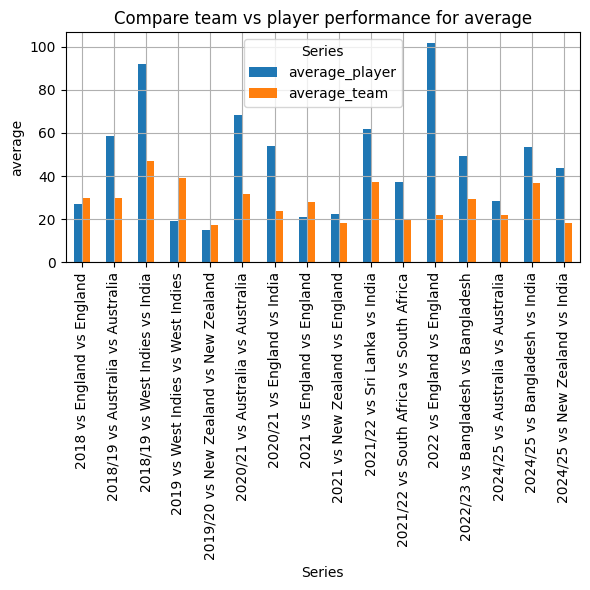

In [262]:
plot_comparison_df(impact, 'average') 

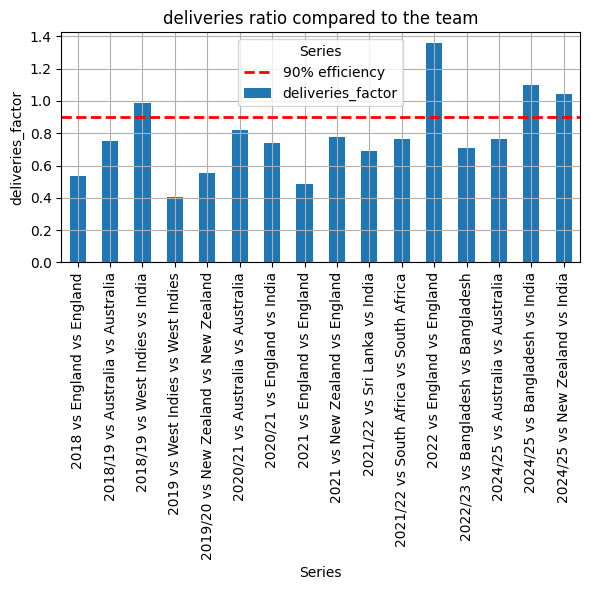

In [263]:
plot_factor_df(impact,'deliveries')

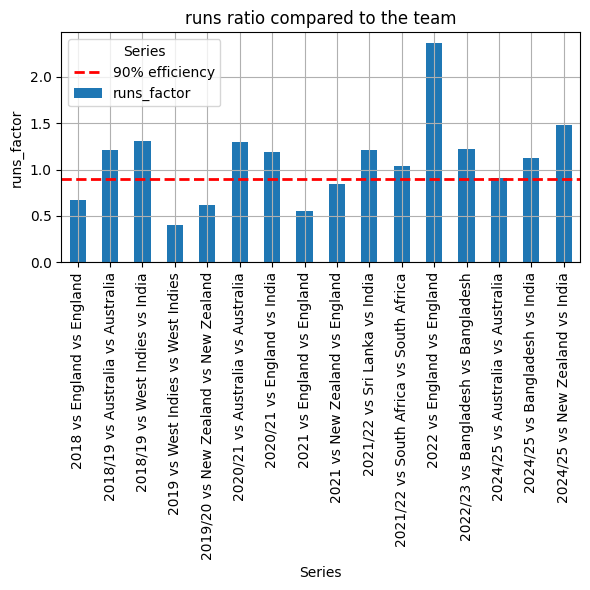

In [264]:
plot_factor_df(impact,'runs')

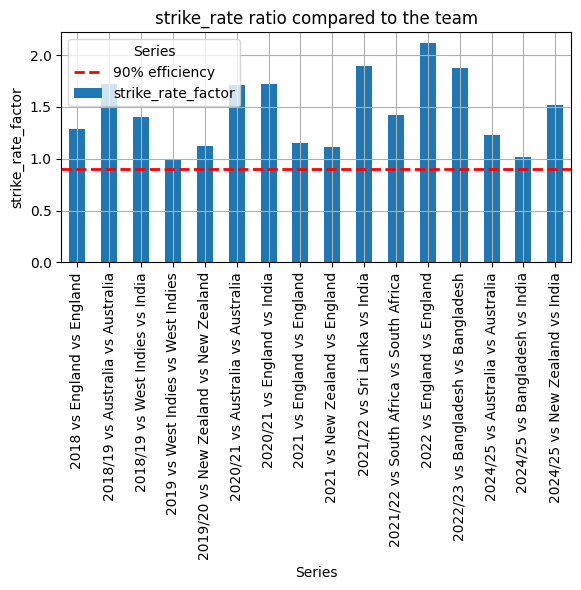

In [265]:
plot_factor_df(impact,'strike_rate')